## Question 1
---
### 1a)

As we *should* know: 

$$f(x+dx) \approx f(x) + f'(x)dx + \frac{1}{2}f''(x)dx^2 + \frac{1}{6}f'''(x)dx^3 + ...$$

And 

$$f(x-dx) \approx f(x) - f'(x)dx + \frac{1}{2}f''(x)dx^2 - \frac{1}{6}f'''(x)dx^3 - ...$$

Similarly, 

$$f(x\pm 2dx) \approx f(x) \pm 2f'(x)dx + 2f''(x)dx^2 \pm \frac{8}{6}f'''(x)dx^3 + ...$$


In combining them, we can write: 

(A) $$f(x+dx) - f(x-dx) \approx 2f'(x)dx +\frac{2}{6}f'''(x)dx^3 + ...$$

and similarly, 

(B) $$f(x+2dx) - f(x-2dx) = 4f'(x)dx + \frac{16}{6}f'''(x)dx^3 +... $$ 


We then subtract 8 times B from A to give (neglecting higher order terms) :

(A) - 8$\times$(B)  = $4f'(x)dx + \frac{16}{6}f'''(x)dx^3 - 8\times(2f'(x)dx + \frac{2}{6}f'''(x)dx^3$ = $-12f'(x)dx$

Thus, we have shown that: 

$$\frac{f(x+2dx) - f(x-2dx) - 8\cdot(f(x+dx) - f(x-dx)) }{-12dx} = f'(x)$$


---
### 1b)


In class, we talked about how machine precision affects the error in our derivative. We expressed this as; 

$$\tilde{f}(x) \rightarrow f(x)(1+g\epsilon)$$ 

where $\tilde{f}(x)$ is what the machine gets, $g$ is gaussian random number of order unity, and $\epsilon$ is the machine precision.

For brevity, let's the equations from **1. a)** as $f(x\pm dx) \rightarrow f_{\pm}$ and similarly $f(x\pm 2dx) \rightarrow f_{2\pm}$ and denote the error in $f'(x)$ as $f_e(x)$

Now we have:

$$f_e'(x) = \frac{(1+g\epsilon)(f_{2+} - f_{2-} - 8(f_+ - f_-))}{-12dx}$$

in the machine. 

We exapand $f_{\pm}$ and$f_{2\pm}$ accordingly and

1. To leading order, i.e. ignore factors of $f'g\epsilon$dx and above
2. Dropping the g as unity
3. Taking the absolute value (we are trying to get an error centered about 0 after all...) 

we have: 

$$\frac{2f\cdot\epsilon + 4f'dx - 16f\cdot\epsilon -16f'dx}{12dx} = f_e'(dx) = \frac{14f\cdot\epsilon}{12dx} +12 f'$$

Differentiating w.r.t $dx$ to minimize $f_e'(x)$:

$$dx = \sqrt{\frac{15f(x)\cdot\epsilon}{144f'(x)}}$$.

For a machine precision of $\approx 10^{-8}$, and the function $e^{x}$ and $e^{0.01x}$ evaluated at x = 1.0.
We would have an optimal $dx$ around $\approx 3.8\cdot10^{-4}$ and $\approx 3.8\cdot10^{-3}$ respectively.





In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [69]:
#Define an exponential exp(x) and exp(0.01*x) and their derivatives.
def fun(x):
    return np.exp(x)

def fun2(x):
    return np.exp(0.01*x)

def der_fun(x, dx):
    return (fun(x+2.0*dx) - fun(x-2.0*dx) - 8.0*(fun(x+dx) - fun(x-dx)))/(-12.0*dx)

def der_fun2(x, dx):
    return (fun2(x+2.0*dx) - fun2(x-2.0*dx) - 8.0*(fun2(x+dx) - fun2(x-dx)))/(-12.0*dx)

In [94]:
dx = np.linspace(1.0e-9, 1.0, 100000, dtype='float64')
#At x = 1.0 exp(x) should have derivative of e and exp(0.01) derivative of 0.01e^0.01
x=1.0 
der = der_fun(x, dx)
der2 = der_fun2(x, dx)

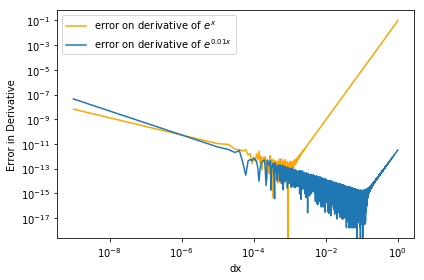

In [95]:
err = np.abs(np.e - der)

err2 = np.abs(np.exp(0.01)*0.01 - der2)
plt.plot(dx, err, '-', label = 'error on derivative of '+r'$e^{x}$', color='orange')
plt.plot(dx, err2, '-', label = 'error on derivative of '+r'$e^{0.01x}$')
plt.xlabel('dx')
plt.ylabel('Error in Derivative')
plt.xscale('log')
plt.legend()
plt.yscale('log')
plt.tight_layout()

As expected, we see minima for values of $dx$ around $10^{-3}$ and $10^{-1}$ !